### Model for fuzzy logic
I have created a fuzzy logic model for watering plants based on air temperature and humidity using the table below.

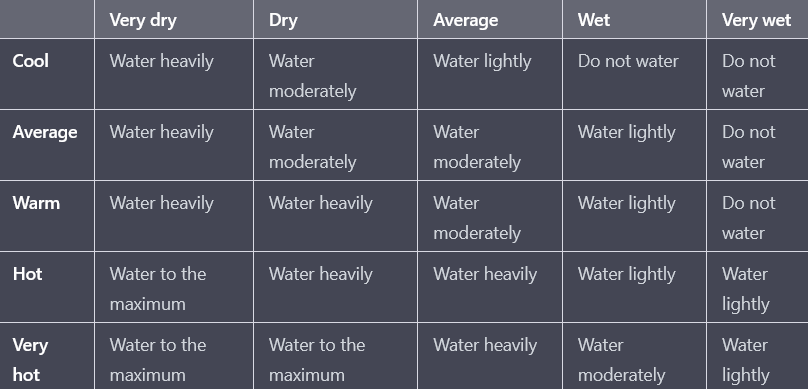

### Installing and importing modules

In [ ]:
!pip install scikit-fuzzy

In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

### Plotting functions

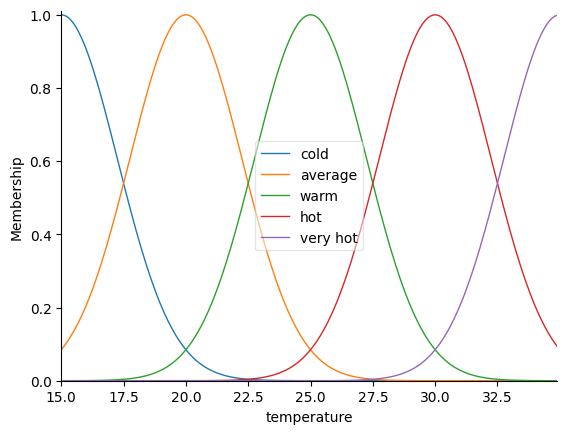

In [7]:
temperature = ctrl.Antecedent(np.arange(15, 35, 0.1),'temperature')

tempetature_sigma = 2.25
temperature['cold'] = fuzz.gaussmf(temperature.universe, 15, tempetature_sigma)
temperature['average'] = fuzz.gaussmf(temperature.universe, 20, tempetature_sigma)
temperature['warm'] = fuzz.gaussmf(temperature.universe, 25, tempetature_sigma)
temperature['hot'] = fuzz.gaussmf(temperature.universe, 30, tempetature_sigma)
temperature['very hot'] = fuzz.gaussmf(temperature.universe, 35, tempetature_sigma)

temperature.view()

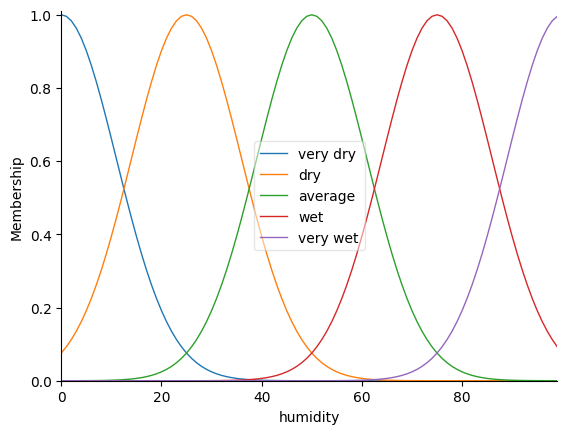

In [8]:
humidity = ctrl.Antecedent(np.arange(0, 100, 1),'humidity')

humimdity_sigma = 11
humidity['very dry'] = fuzz.gaussmf(humidity.universe, 0, humimdity_sigma)
humidity['dry'] = fuzz.gaussmf(humidity.universe, 25, humimdity_sigma)
humidity['average'] = fuzz.gaussmf(humidity.universe, 50, humimdity_sigma)
humidity['wet'] = fuzz.gaussmf(humidity.universe, 75, humimdity_sigma)
humidity['very wet'] = fuzz.gaussmf(humidity.universe, 100, humimdity_sigma)

humidity.view()

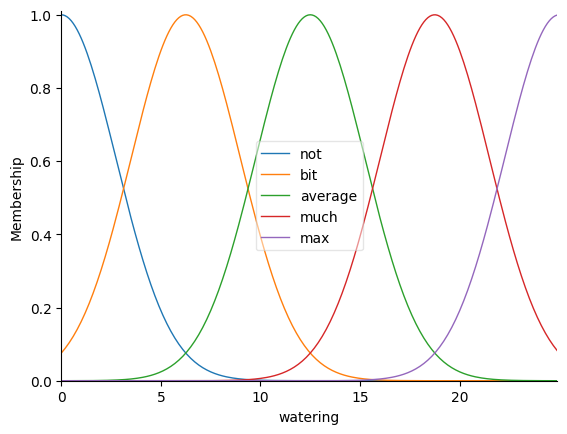

In [9]:
watering = ctrl.Consequent(np.arange(0, 25, 0.1),'watering')

watering_sigma = 2.75
watering['not'] = fuzz.gaussmf(watering.universe, 0, watering_sigma)
watering['bit'] = fuzz.gaussmf(watering.universe, 6.25, watering_sigma)
watering['average'] = fuzz.gaussmf(watering.universe, 12.5, watering_sigma)
watering['much'] = fuzz.gaussmf(watering.universe, 18.75, watering_sigma)
watering['max'] = fuzz.gaussmf(watering.universe, 25, watering_sigma)

watering.view()

### Creating rules for model

In [10]:
rules = [ctrl.Rule((temperature['cold'] | temperature['average'] | temperature['warm']) & humidity['very dry'], watering['much']),
         ctrl.Rule((temperature['hot'] | temperature['very hot']) & humidity['very dry'], watering['max']),
         ctrl.Rule((temperature['cold'] | temperature['average']) & humidity['dry'], watering['average']),
         ctrl.Rule((temperature['warm'] | temperature['hot']) & humidity['dry'], watering['much']),
         ctrl.Rule((temperature['very hot']) & humidity['dry'], watering['max']),
         ctrl.Rule((temperature['cold']) & humidity['average'], watering['bit']),
         ctrl.Rule((temperature['average'] | temperature['warm']) & humidity['average'], watering['average']),
         ctrl.Rule((temperature['very hot']) & humidity['average'], watering['much']),
         ctrl.Rule((temperature['cold']) & humidity['wet'], watering['not']),
         ctrl.Rule((temperature['average'] | temperature['warm'] | temperature['hot']) & humidity['wet'], watering['bit']),
         ctrl.Rule((temperature['very hot']) & humidity['wet'], watering['average']),
         ctrl.Rule((temperature['cold'] | temperature['average'] | temperature['warm']) & humidity['very wet'], watering['not']),
         ctrl.Rule((temperature['hot'] | temperature['very hot']) & humidity['very wet'], watering['bit'])
        ]

control_system = ctrl.ControlSystem(rules)
model = ctrl.ControlSystemSimulation(control_system)

### Drawing heatmap

<Axes: xlabel='temperature', ylabel='humidity'>

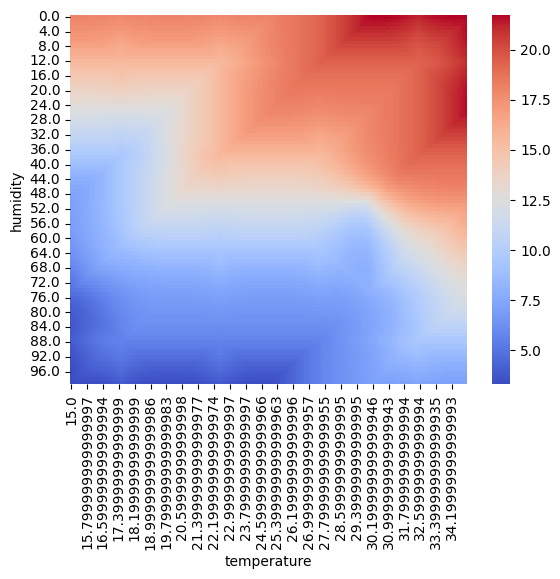

In [11]:
import seaborn as sns
import pandas as pd

temperature_grid, humidity_grid = np.meshgrid(np.arange(15, 35, 0.1), np.arange(0, 100, 1))
test_points = np.transpose(np.vstack((np.ravel(temperature_grid),np.ravel(humidity_grid))))

model.input['temperature'] = test_points[:,0]
model.input['humidity'] = test_points[:,1]
model.compute()

test_points = np.concatenate((test_points, model.output['watering'].reshape(-1,1)), axis=1)

sns.heatmap(pd.DataFrame(test_points, columns = ['temperature','humidity','watering']).pivot(index='humidity', columns='temperature', values='watering'), cmap = 'coolwarm')